# Regression Analysis of State Spending and Student Outcomes

## Introduction

This analysis explores the relationship between state spending on education and student outcomes, specifically focusing on SAT scores. The data contains the following variables for each state:

- **expend**: Expenditure per pupil  
- **ratio**: Pupil/teacher ratio  
- **salary**: Teacher salary  
- **takers**: Percentage of students taking the SAT  
- **verbal**, **math**: SAT component scores  
- **total**: Average total SAT score  

The primary goal is to determine if and how state spending factors correlate with improved SAT outcomes, taking into account potential confounders like the **takers** variable.

---

## Preliminary Analysis

In [1]:
# libraries used in this analysis
library(faraway)
library(ppcor)
library(car)
library(Hmisc)
library(dplyr)
library(ggplot2)

sat_scores = sat

Loading required package: MASS

Loading required package: carData


Attaching package: ‘car’


The following objects are masked from ‘package:faraway’:

    logit, vif



Attaching package: ‘Hmisc’


The following objects are masked from ‘package:base’:

    format.pval, units



Attaching package: ‘dplyr’


The following objects are masked from ‘package:Hmisc’:

    src, summarize


The following object is masked from ‘package:car’:

    recode


The following object is masked from ‘package:MASS’:

    select


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
# Calculate summary statistics to answer the questions
# 1. Average spending per state
average_spending <- mean(sat$expend)
print(paste("Average spending per state:", average_spending))

[1] "Average spending per state: 5.90526"


In [3]:
# 2. Summary statistics for spending, ratio, and salary
summary_stats <- summary(sat[, c("expend", "ratio", "salary")])
print("Summary statistics for spending, ratio, and salary:")
print(summary_stats)

[1] "Summary statistics for spending, ratio, and salary:"
     expend          ratio           salary     
 Min.   :3.656   Min.   :13.80   Min.   :25.99  
 1st Qu.:4.882   1st Qu.:15.22   1st Qu.:30.98  
 Median :5.768   Median :16.60   Median :33.29  
 Mean   :5.905   Mean   :16.86   Mean   :34.83  
 3rd Qu.:6.434   3rd Qu.:17.57   3rd Qu.:38.55  
 Max.   :9.774   Max.   :24.30   Max.   :50.05  


> **Analysis**: There are some dramatic differences in state spending within these categories. Expenditure can nearly triple, while ratio and salary can nearly double, depending on the state.

In [4]:
# 3. Identify states that stand out in terms of spending, ratio, or salary
high_spending <- sat[sat$expend > quantile(sat$expend, 0.9), ]
low_spending  <- sat[sat$expend < quantile(sat$expend, 0.1), ]

# sort by expend
high_spending <- high_spending[order(-high_spending$expend), ]
low_spending  <- low_spending[order(-low_spending$expend), ]

print(high_spending)
print(low_spending)

             expend ratio salary takers verbal math total
New Jersey    9.774  13.8 46.087     70    420  478   898
New York      9.623  15.2 47.612     74    419  473   892
Alaska        8.963  17.6 47.951     47    445  489   934
Connecticut   8.817  14.4 50.045     81    431  477   908
Rhode Island  7.469  14.7 40.729     70    425  463   888
            expend ratio salary takers verbal math total
Alabama      4.405  17.2 31.144      8    491  538  1029
Tennessee    4.388  18.6 32.477     12    497  543  1040
Idaho        4.210  19.1 29.783     15    468  511   979
Mississippi  4.080  17.5 26.818      4    496  540  1036
Utah         3.656  24.3 29.082      4    513  563  1076


>**Analysis:** Two interesting things stand out that will likely affect our conclusions about state spending:
> 1. States that spend the least per pupil actually have higher test scores compared to those that spend the most.  
> 2. The **takers** variable is significantly lower for those low-spending states, suggesting fewer students (possibly only the most college-motivated) take the test.  

Similar comparisons were done for **ratio** and **salary**:

In [5]:
high_ratio <- sat[sat$ratio > quantile(sat$ratio, 0.9), ]
low_ratio  <- sat[sat$ratio < quantile(sat$ratio, 0.1), ]
print(high_ratio)
print(low_ratio)

           expend ratio salary takers verbal math total
California  4.992  24.0 41.078     45    417  485   902
Michigan    6.994  20.1 41.895     11    484  549  1033
Oregon      6.436  19.9 38.555     51    448  499   947
Utah        3.656  24.3 29.082      4    513  563  1076
Washington  5.906  20.2 36.151     48    443  494   937
             expend ratio salary takers verbal math total
Connecticut   8.817  14.4 50.045     81    431  477   908
Maine         6.428  13.8 31.972     68    427  469   896
New Jersey    9.774  13.8 46.087     70    420  478   898
South Dakota  4.775  14.4 25.994      5    505  563  1068
Vermont       6.750  13.8 35.406     68    429  472   901


> **Analysis**: Looking at the top and bottom 10%, ratio seems to have less of an impact on scores

In [6]:
high_salary <- sat[sat$salary > quantile(sat$salary, 0.9), ]
low_salary  <- sat[sat$salary < quantile(sat$salary, 0.1), ]
print(high_salary)
print(low_salary)

             expend ratio salary takers verbal math total
Alaska        8.963  17.6 47.951     47    445  489   934
Connecticut   8.817  14.4 50.045     81    431  477   908
New Jersey    9.774  13.8 46.087     70    420  478   898
New York      9.623  15.2 47.612     74    419  473   892
Pennsylvania  7.109  17.1 44.510     70    419  461   880
             expend ratio salary takers verbal math total
Louisiana     4.761  16.8 26.461      9    486  535  1021
Mississippi   4.080  17.5 26.818      4    496  540  1036
North Dakota  4.775  15.3 26.327      5    515  592  1107
Oklahoma      4.845  15.5 28.172      9    491  536  1027
South Dakota  4.775  14.4 25.994      5    505  563  1068


> **Analysis**: Salary seems to have a similar pattern as expend (which makes sense because I am assuming expenditure per pupil includes how much is spent on teacher). We may run into the issue of low salary being correlated with higher test scores but lower takers in general. 

Finally, we look at typical (median) values:

In [7]:
# Typical spending, ratio, and outcomes
typical_values <- apply(sat[, c("expend", "ratio", "salary", "total")], 2, median)
print("Typical values for spending, ratio, salary, and total SAT score:")
print(typical_values)

[1] "Typical values for spending, ratio, salary, and total SAT score:"
  expend    ratio   salary    total 
  5.7675  16.6000  33.2875 945.5000 


---

## Correlation Analysis

Now that we have a good overview of our data, I will look deeper into trends. We will use a few main questions to help us guide our analysis. 


**Primary questions**:  
1. Which single variable (expend, ratio, salary, takers) correlates most strongly with higher test scores?  
2. Is a higher **takers** value associated with higher salaries, expenditures, or ratio? If so, what (if anything) does that say about how expenditures affect test scores?  
3. How well can we predict total SAT scores using all four predictors in our model (expend, ratio, salary, takers)?

In [8]:
# Correlation analysis to determine which variable is correlated with higher test scores

test_expend_total <- cor.test(sat$expend, sat$total)
test_ratio_total  <- cor.test(sat$ratio, sat$total)
test_salary_total <- cor.test(sat$salary, sat$total)
test_takers_total <- cor.test(sat$takers, sat$total)

print(paste("Correlation between expenditure and total SAT score:", test_expend_total$estimate))
print(paste("P-value:", test_expend_total$p.value))

print(paste("Correlation between pupil/teacher ratio and total SAT score:", test_ratio_total$estimate))
print(paste("P-value:", test_ratio_total$p.value))

print(paste("Correlation between teacher salary and total SAT score:", test_salary_total$estimate))
print(paste("P-value:", test_salary_total$p.value))

print(paste("Correlation between percentage of takers and total SAT score:", test_takers_total$estimate))
print(paste("P-value:", test_takers_total$p.value))

[1] "Correlation between expenditure and total SAT score: -0.380537003304565"
[1] "P-value: 0.00640796491636461"
[1] "Correlation between pupil/teacher ratio and total SAT score: 0.0812538230594526"
[1] "P-value: 0.574832901970001"
[1] "Correlation between teacher salary and total SAT score: -0.439883381441706"
[1] "P-value: 0.00139131045891996"
[1] "Correlation between percentage of takers and total SAT score: -0.88711867563963"
[1] "P-value: 9.79187514546841e-18"


> **Analysis**: The **takers** variable has the strongest (negative) correlation with total SAT score, which makes intuitive sense: more widespread participation tends to lower the average score. Expenditure and salary show moderate negative correlations with total SAT scores, likely reflecting the influence of **takers**.

Below are the plots of **expend**, **salary**, and **takers** vs **total SAT score** (omitting the code output).  

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


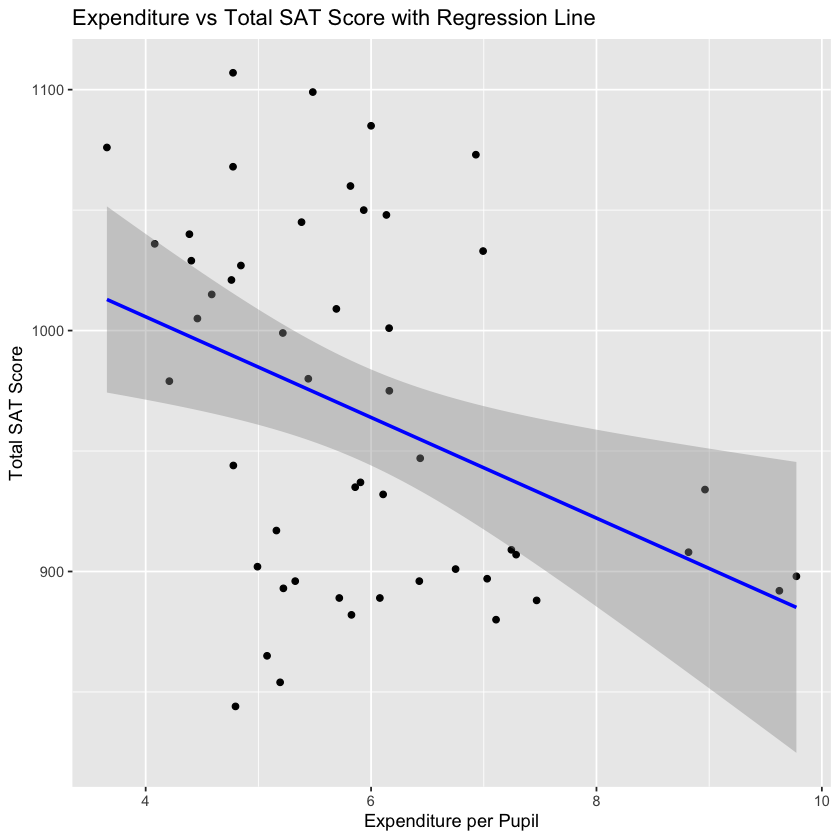

`geom_smooth()` using formula = 'y ~ x'


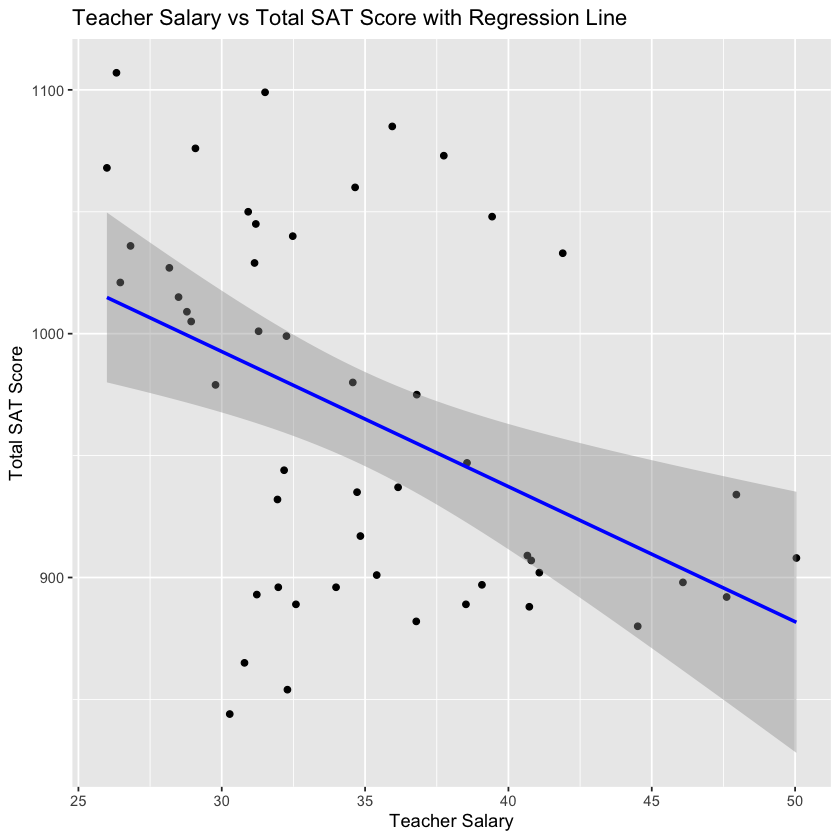

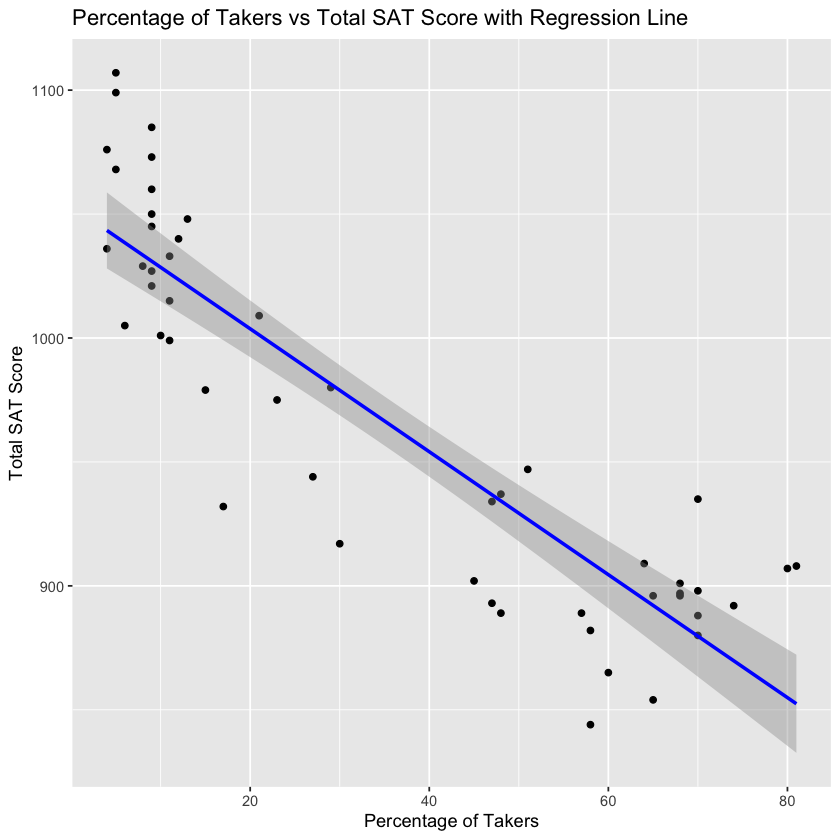

In [9]:
# Plot each variable vs total SAT score with a regression line

ggplot(sat, aes(x = expend, y = total)) +
  geom_point() +
  geom_smooth(method = "lm", col = "blue") +
  xlab("Expenditure per Pupil") +
  ylab("Total SAT Score") +
  ggtitle("Expenditure vs Total SAT Score with Regression Line")

ggplot(sat, aes(x = salary, y = total)) +
  geom_point() +
  geom_smooth(method = "lm", col = "blue") +
  xlab("Teacher Salary") +
  ylab("Total SAT Score") +
  ggtitle("Teacher Salary vs Total SAT Score with Regression Line")

ggplot(sat, aes(x = takers, y = total)) +
  geom_point() +
  geom_smooth(method = "lm", col = "blue") +
  xlab("Percentage of Takers") +
  ylab("Total SAT Score") +
  ggtitle("Percentage of Takers vs Total SAT Score with Regression Line")

> **Analysis of Plots**: My initial assumptions about the effect of the "Takers" variable seems to be supported by the data. Higher spending on students is actually *negatively* correlated with total test score, although this coloration is moderate (-0.38 for expend,-0.44 for salary). By far, the biggest predictor of student test scores is the number of takers. This is making it difficult to draw conclusions about the effect of spending on test scores. The negative correlation between spending and test scores could mean higher spending is associated with greater overall participation in the SAT, which could lower the average score. We can't draw any conclusions about the effect of spending on test scores without controlling for the number of takers. To address this we will try 2 different methods.


---

## Method 1: Filtering the Data Based on **takers**

Since **takers** is overshadowing the other variables, we attempt to control for it by splitting the data into subsets with different thresholds for **takers**. We wrote a function `find_optimal_threshold` to systematically search for a threshold that yields minimal correlation between **takers** and total scores while preserving a reasonably large subset. Below are the first few lines of the function; please copy/paste the rest from your original code:

In [10]:
# This function iteratively tests different thresholds and calculates the correlation between takers and total SAT score for states above or below each threshold. It aims to minimize the correlation while maximizing the number of states.

find_optimal_threshold <- function(sat_data, direction = "above", min_cor) {
  # Create a sequence of thresholds from 0 to the maximum percentage of takers, with a step size of 1
  thresholds <- seq(0, max(sat_data$takers), by = 1)
  
  # Initialize an empty data frame to store threshold results
  results <- data.frame(threshold = numeric(), num_states = numeric(), cor_takers_total = numeric())
  
  # Iterate over each threshold in the sequence from 1 to the maximum percentage of takers
  for (threshold in 1:max(sat_data$takers)) {
    # Create a subset of the data based on the threshold and the direction ("above" or "below")
    if (direction == "above") {
      subset_data <- sat_data %>% filter(takers >= threshold)
    } else if (direction == "below") {
      subset_data <- sat_data %>% filter(takers <= threshold)
    } else {
      stop("Invalid direction. Use 'above' or 'below'.")  # Error handling for invalid direction values
    }
    
    # Only proceed if the subset has more than 19 states (to ensure a meaningful correlation)
    if (nrow(subset_data) > 19) {
      # Calculate the correlation between the percentage of takers and total SAT score
      cor_value <- cor(subset_data$takers, subset_data$total)
      
      # Add the threshold, number of states, and correlation value to the results data frame
      results <- rbind(results, data.frame(threshold = threshold, num_states = nrow(subset_data), cor_takers_total = cor_value))
    }
  }
  
  # Find the threshold that has the largest number of states with an absolute correlation value less than or equal to min_cor
  optimal_threshold <- results %>% 
    filter(abs(cor_takers_total) <= min_cor) %>%  # Filter rows with correlation <= min_cor
    arrange(desc(num_states)) %>%                 # Arrange rows by the number of states in descending order
    slice(1)                                      # Select the first row (maximum number of states)
  
  return(optimal_threshold)  # Return the optimal threshold
}

We run this function on the dataset:

In [11]:
# Load the data
data <- sat_scores

# Run the function to find the optimal lower threshold
optimal_lower_threshold <- find_optimal_threshold(data, direction = "below", 0.5)
print(optimal_lower_threshold)

# Filter the data using the optimal lower threshold for further analysis
filtered_lower_data <- data %>% filter(takers <= optimal_lower_threshold$threshold)

# Print the filtered data to verify
print(filtered_lower_data)

# Run the function to find the optimal upper threshold
optimal_upper_threshold <- find_optimal_threshold(data, direction = "above", 0.05)
print(optimal_upper_threshold)

# Filter the data using the optimal upper threshold for further analysis
filtered_upper_data <- data %>% filter(takers >= optimal_upper_threshold$threshold)

# Print the filtered data to verify
print(filtered_upper_data)

  threshold num_states cor_takers_total
1        13         20       -0.4593847
             expend ratio salary takers verbal math total
Alabama       4.405  17.2 31.144      8    491  538  1029
Arkansas      4.459  17.1 28.934      6    482  523  1005
Illinois      6.136  17.3 39.431     13    488  560  1048
Iowa          5.483  15.8 31.511      5    516  583  1099
Kansas        5.817  15.1 34.652      9    503  557  1060
Kentucky      5.217  17.0 32.257     11    477  522   999
Louisiana     4.761  16.8 26.461      9    486  535  1021
Michigan      6.994  20.1 41.895     11    484  549  1033
Minnesota     6.000  17.5 35.948      9    506  579  1085
Mississippi   4.080  17.5 26.818      4    496  540  1036
Missouri      5.383  15.5 31.189      9    495  550  1045
Nebraska      5.935  14.5 30.922      9    494  556  1050
New Mexico    4.586  17.2 28.493     11    485  530  1015
North Dakota  4.775  15.3 26.327      5    515  592  1107
Oklahoma      4.845  15.5 28.172      9    491  53

> **Analysis**: To obtain a reasonable number of states in the lower **takers** group, I had to raise the correlation threshold to 0.5. This suggests that in states where fewer students take the SAT, the correlation between **takers** and total score is much stronger. In contrast, for states where at least 48% of students take the SAT, this correlation weakens significantly to -0.046. Given this, we will focus our analysis on the **upper threshold group** (states with **takers ≥ 48%**) since the influence of **takers** on total SAT scores is less pronounced. However, this subset includes only 20 states, which limits our sample size. While this is not ideal, it provides the best available data for isolating the effect of state spending on SAT performance.

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


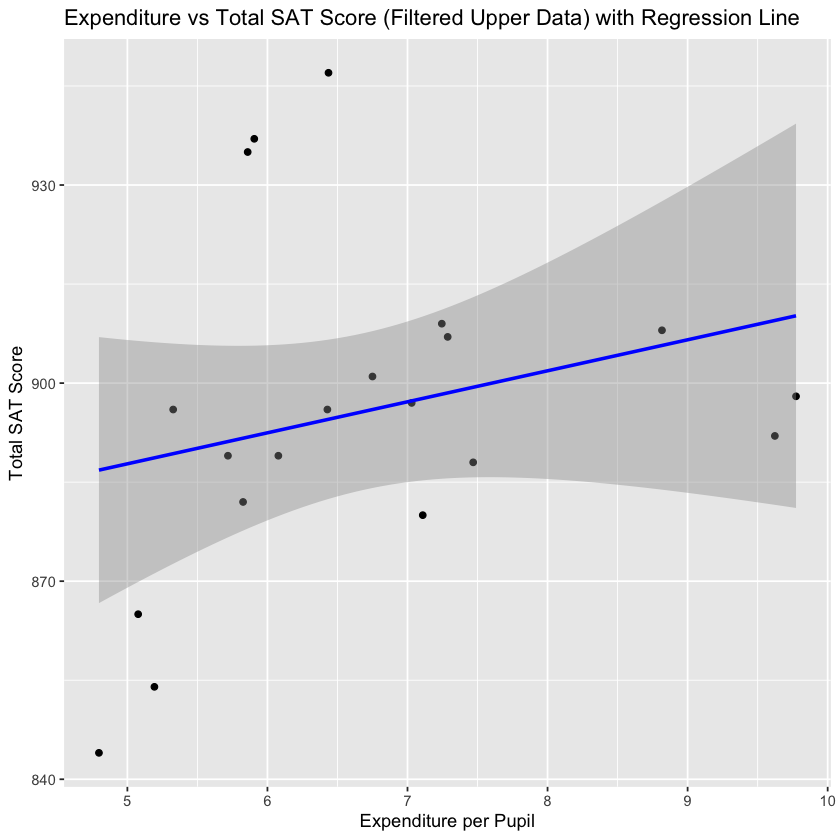

`geom_smooth()` using formula = 'y ~ x'


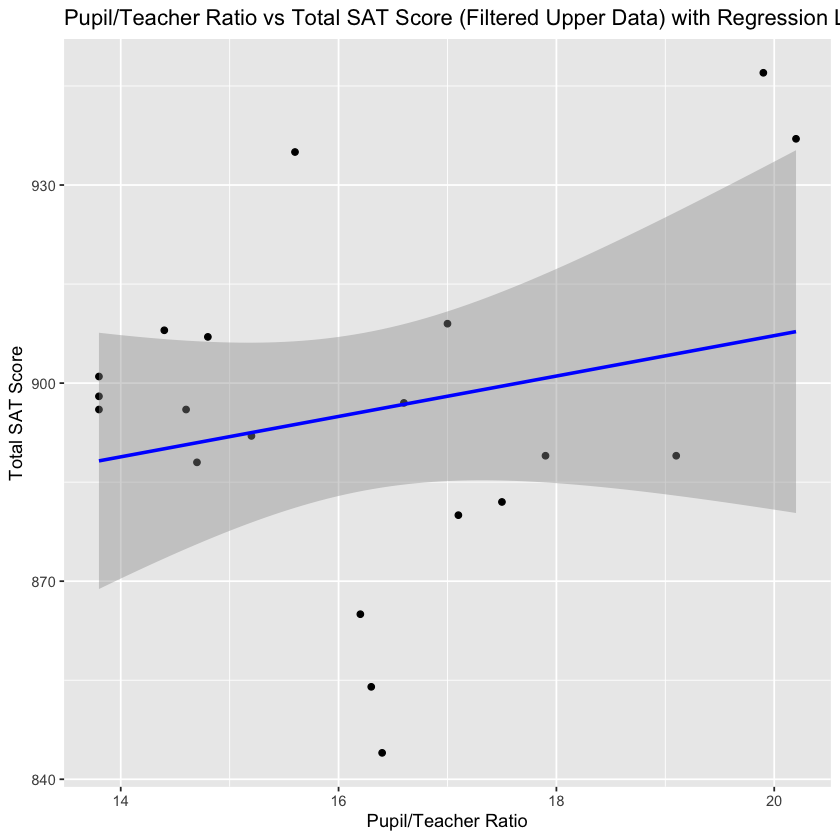

[1] "Correlation between expenditure and total SAT score (filtered upper data): 0.260748048485659 - p-value: 0.266842817265977"
[1] "Correlation between pupil/teacher ratio and total SAT score (filtered upper data): 0.235366844483989 - p-value: 0.317822523487081"
[1] "Correlation between teacher salary and total SAT score (filtered upper data): 0.286639075144664 - p-value: 0.220476396696534"


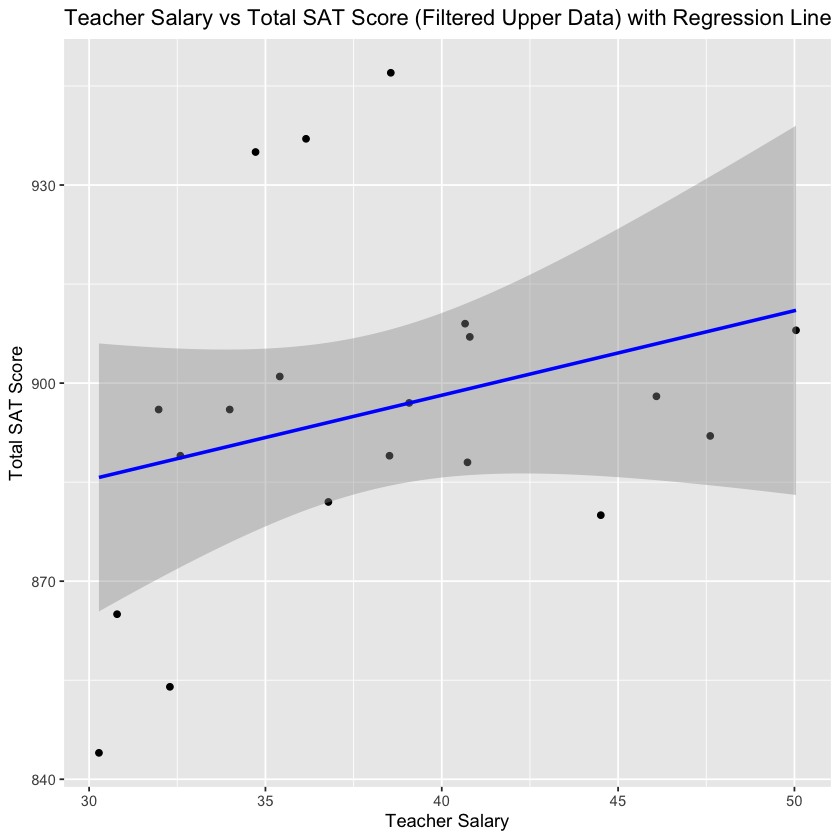

In [12]:

# Expenditure vs Total SAT Score (Filtered Upper Data)
ggplot(filtered_upper_data, aes(x = expend, y = total)) +
  geom_point() +
  geom_smooth(method = "lm", col = "blue") +
  xlab("Expenditure per Pupil") +
  ylab("Total SAT Score") +
  ggtitle("Expenditure vs Total SAT Score (Filtered Upper Data) with Regression Line")

# Pupil/Teacher Ratio vs Total SAT Score (Filtered Upper Data)
ggplot(filtered_upper_data, aes(x = ratio, y = total)) +
  geom_point() +
  geom_smooth(method = "lm", col = "blue") +
  xlab("Pupil/Teacher Ratio") +
  ylab("Total SAT Score") +
  ggtitle("Pupil/Teacher Ratio vs Total SAT Score (Filtered Upper Data) with Regression Line")

# Teacher Salary vs Total SAT Score (Filtered Upper Data)
ggplot(filtered_upper_data, aes(x = salary, y = total)) +
  geom_point() +
  geom_smooth(method = "lm", col = "blue") +
  xlab("Teacher Salary") +
  ylab("Total SAT Score") +
  ggtitle("Teacher Salary vs Total SAT Score (Filtered Upper Data) with Regression Line")


# Calculate and print correlation coefficients for the filtered upper data
cor_expend_total_filtered_upper <- cor(filtered_upper_data$expend, filtered_upper_data$total)
cor_ratio_total_filtered_upper <- cor(filtered_upper_data$ratio, filtered_upper_data$total)
cor_salary_total_filtered_upper <- cor(filtered_upper_data$salary, filtered_upper_data$total)

# Perform correlation tests to check statistical significance
cor_expend_test_upper <- rcorr(filtered_upper_data$expend, filtered_upper_data$total)
cor_ratio_test_upper <- rcorr(filtered_upper_data$ratio, filtered_upper_data$total)
cor_salary_test_upper <- rcorr(filtered_upper_data$salary, filtered_upper_data$total)

print(paste("Correlation between expenditure and total SAT score (filtered upper data):", cor_expend_total_filtered_upper, "- p-value:", cor_expend_test_upper$P[1,2]))
print(paste("Correlation between pupil/teacher ratio and total SAT score (filtered upper data):", cor_ratio_total_filtered_upper, "- p-value:", cor_ratio_test_upper$P[1,2]))
print(paste("Correlation between teacher salary and total SAT score (filtered upper data):", cor_salary_total_filtered_upper, "- p-value:", cor_salary_test_upper$P[1,2]))

> **Analysis**: None of the relationships are statistically significant after filtering. Likely, the small sample size prevents us from drawing robust conclusions about expenditure, ratio, or salary once we hold **takers** above a certain level.

---

## Method 2: Controlling for **takers** in a Multiple Linear Regression

For this next method, we will try utilizing avPlots to control for the effect of the 'takers' variable in a multiple linear regression model. This will allow us to analyze the relationship between expenditure, pupil/teacher ratio, teacher salary, and total SAT score independently of the 'takers' variable. We will fit a multiple linear regression model with 'takers' included as a covariate and visualize the relationships using partial regression plots.

In [13]:
model <- lm(total ~ expend + ratio + salary + takers, data = sat_scores)
summary(model)


Call:
lm(formula = total ~ expend + ratio + salary + takers, data = sat_scores)

Residuals:
    Min      1Q  Median      3Q     Max 
-90.531 -20.855  -1.746  15.979  66.571 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1045.9715    52.8698  19.784  < 2e-16 ***
expend         4.4626    10.5465   0.423    0.674    
ratio         -3.6242     3.2154  -1.127    0.266    
salary         1.6379     2.3872   0.686    0.496    
takers        -2.9045     0.2313 -12.559 2.61e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 32.7 on 45 degrees of freedom
Multiple R-squared:  0.8246,	Adjusted R-squared:  0.809 
F-statistic: 52.88 on 4 and 45 DF,  p-value: < 2.2e-16


> **Analysis**:  
> - The model captures about 82–83% of the variance.  
> - Only **takers** is statistically significant.  
> - Once we control for **takers**, partial correlations of expend, ratio, and salary with total score are not significant.

We confirm with partial correlations:

In [14]:
# Extract the relevant columns
sat_data_subset <- sat_scores[, c("expend", "ratio", "salary", "takers", "total")]

# Calculate partial correlation controlling for all other variables
partial_cor_results <- pcor(sat_data_subset)

# Extracting specific partial correlations
partial_cor_expend_total <- partial_cor_results$estimate["expend", "total"]
p_value_expend_total <- partial_cor_results$p.value["expend", "total"]

partial_cor_ratio_total <- partial_cor_results$estimate["ratio", "total"]
p_value_ratio_total <- partial_cor_results$p.value["ratio", "total"]

partial_cor_salary_total <- partial_cor_results$estimate["salary", "total"]
p_value_salary_total <- partial_cor_results$p.value["salary", "total"]

# Print the specific partial correlations and p-values
print(paste("Partial correlation between expenditure and total SAT score:", partial_cor_expend_total, "- p-value:", p_value_expend_total))
print(paste("Partial correlation between pupil/teacher ratio and total SAT score:", partial_cor_ratio_total, "- p-value:", p_value_ratio_total))
print(paste("Partial correlation between teacher salary and total SAT score:", partial_cor_salary_total, "- p-value:", p_value_salary_total))



[1] "Partial correlation between expenditure and total SAT score: 0.0629519749021953 - p-value: 0.674212957605271"
[1] "Partial correlation between pupil/teacher ratio and total SAT score: -0.165701602722247 - p-value: 0.265657031339913"
[1] "Partial correlation between teacher salary and total SAT score: 0.10174857781536 - p-value: 0.496163167244546"


> **Analysis**: Unfortunately, once again, our p-values are not significant for any of our variables. This means that we still cannot draw any meaningful conclusions about the relationship between expenditure, pupil/teacher ratio, teacher salary, and total SAT score when controlling for the 'takers' variable. This could be due to the strong correlation between 'takers' and total SAT score, which may overshadow the effects of other variables in the model.

---

## Predictive Power and Residual Analysis

Moving on from our analysis of spendings impact on test scores, we will now look at our ability to predict total SAT scores using all 4 predictors in our model (expend, ratio, salary, takers). We already created this model in our previous analysis, so we will now evaluate its performance and check for any potential issues by plotting the residuals.

We use the same regression model `model <- lm(total ~ expend + ratio + salary + takers, ...)` and then check residual plots:

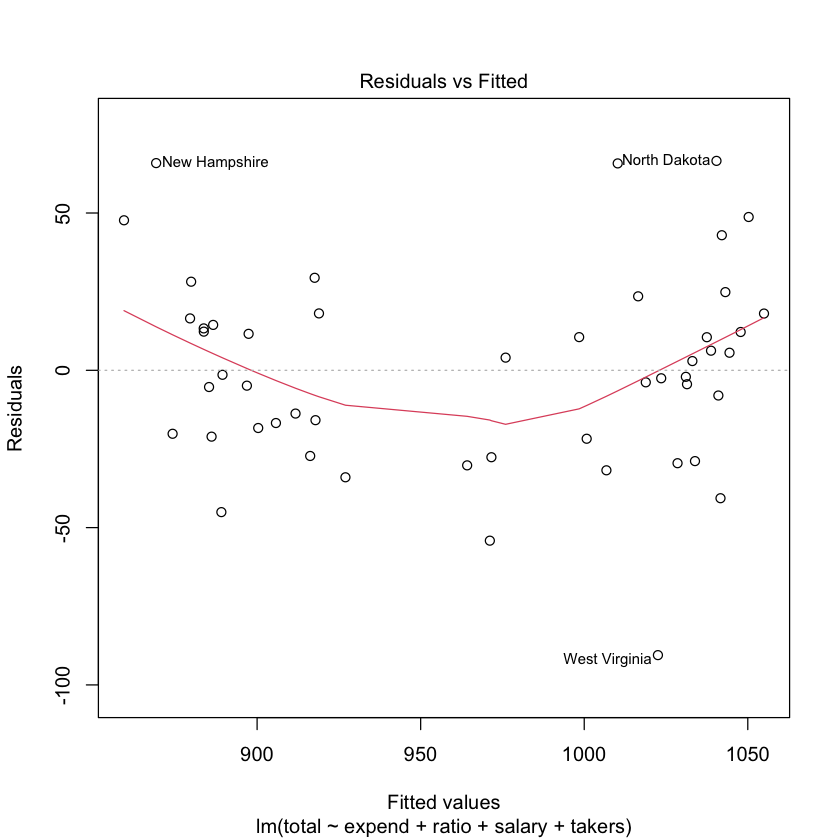

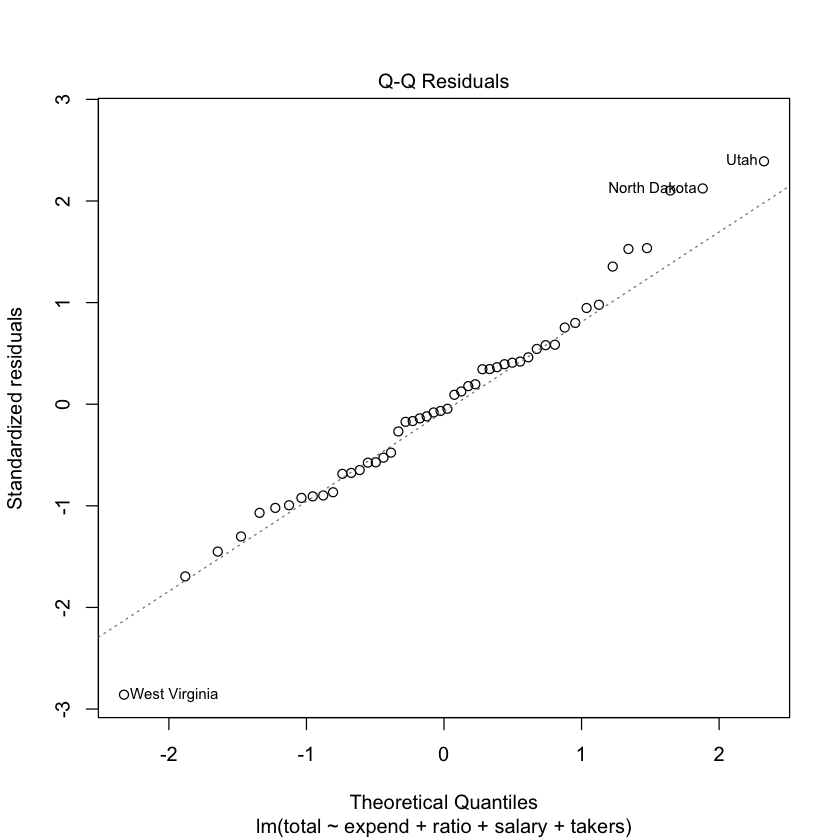

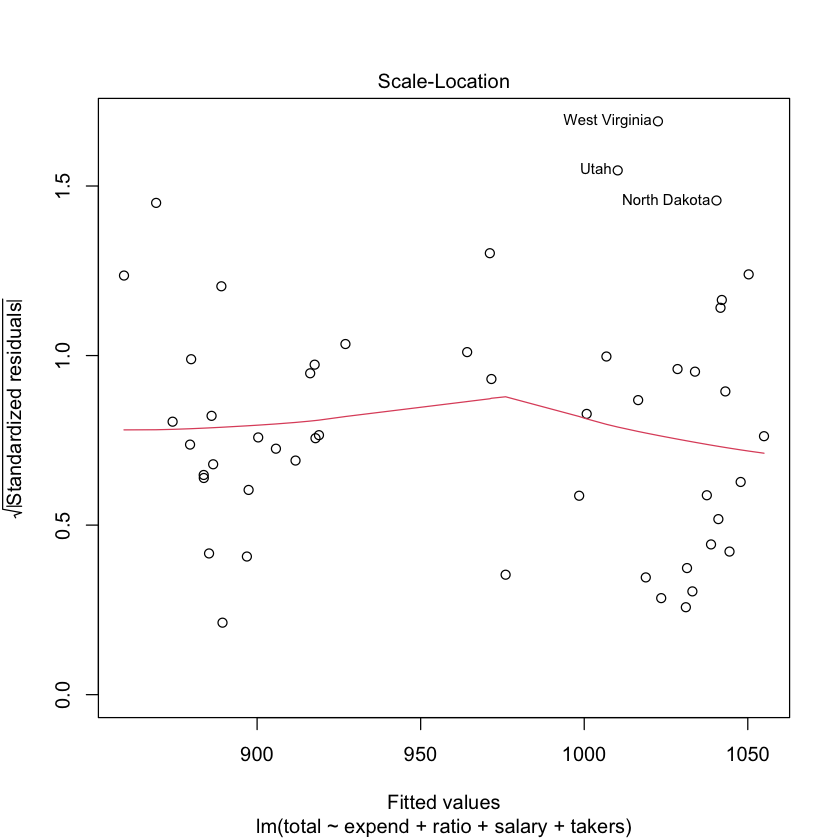

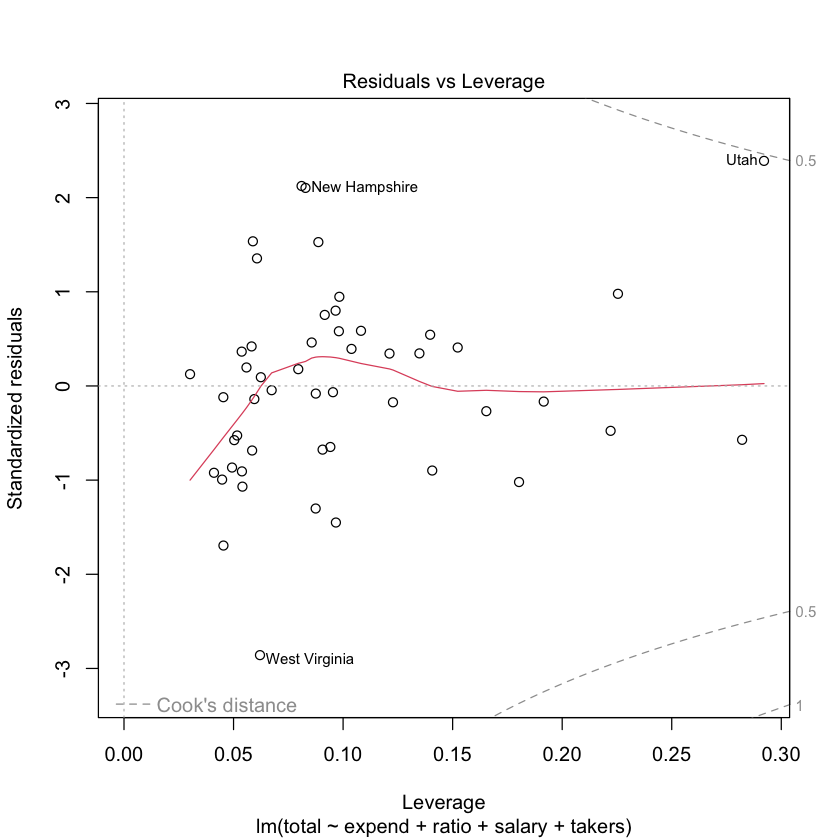

In [15]:
plot(model)

> **Analysis**: Our residuals seem to be normally distributed, but there is a slight pattern in the residuals vs fitted plot. This indicates that our model is not capturing all of the variance in our data. Our model is relatively successful at predicting total SAT scores. However, all its predictions are based on the number of takers. .

We also check the relationship between **takers** and the other variables:

In [16]:
data <- sat_scores

# Calculate correlation coefficients and p-values for takers vs expend, takers vs salary, and takers vs ratio
cor_expend_takers <- rcorr(data$expend, data$takers)
cor_salary_takers <- rcorr(data$salary, data$takers)
cor_ratio_takers <- rcorr(data$ratio, data$takers)

# Print the correlation coefficients and p-values
print(paste("Correlation between takers and expenditure:", cor_expend_takers$r[1, 2], "- p-value:", cor_expend_takers$P[1, 2]))
print(paste("Correlation between takers and salary:", cor_salary_takers$r[1, 2], "- p-value:", cor_salary_takers$P[1, 2]))
print(paste("Correlation between takers and ratio:", cor_ratio_takers$r[1, 2], "- p-value:", cor_ratio_takers$P[1, 2]))

[1] "Correlation between takers and expenditure: 0.592627382013708 - p-value: 5.78089318392649e-06"
[1] "Correlation between takers and salary: 0.616779866548609 - p-value: 1.84554826643257e-06"
[1] "Correlation between takers and ratio: -0.213053606981405 - p-value: 0.137404087906956"


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


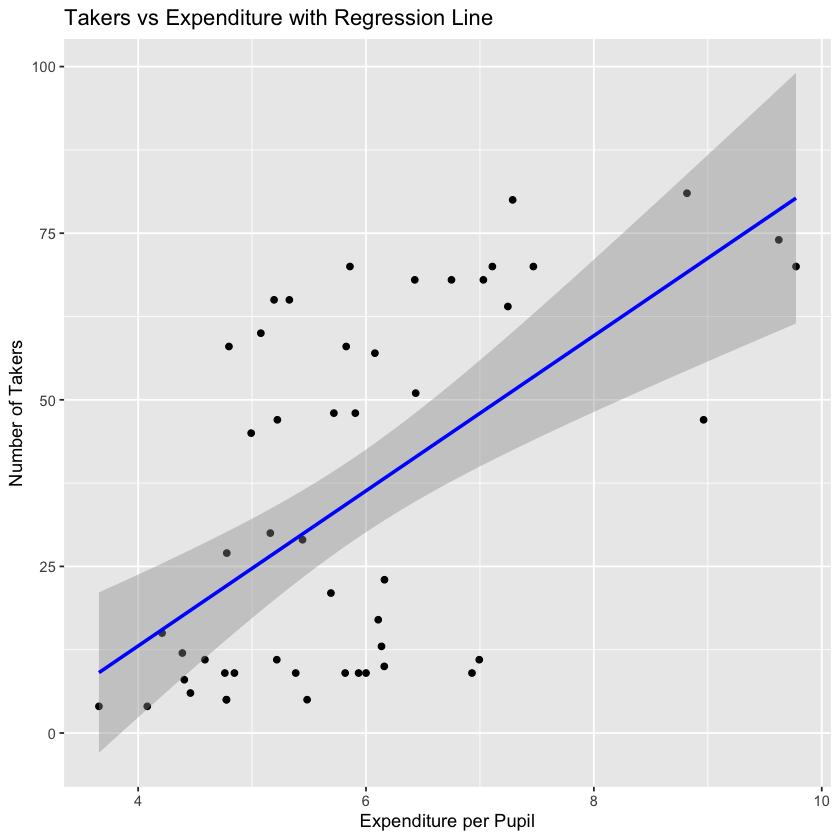

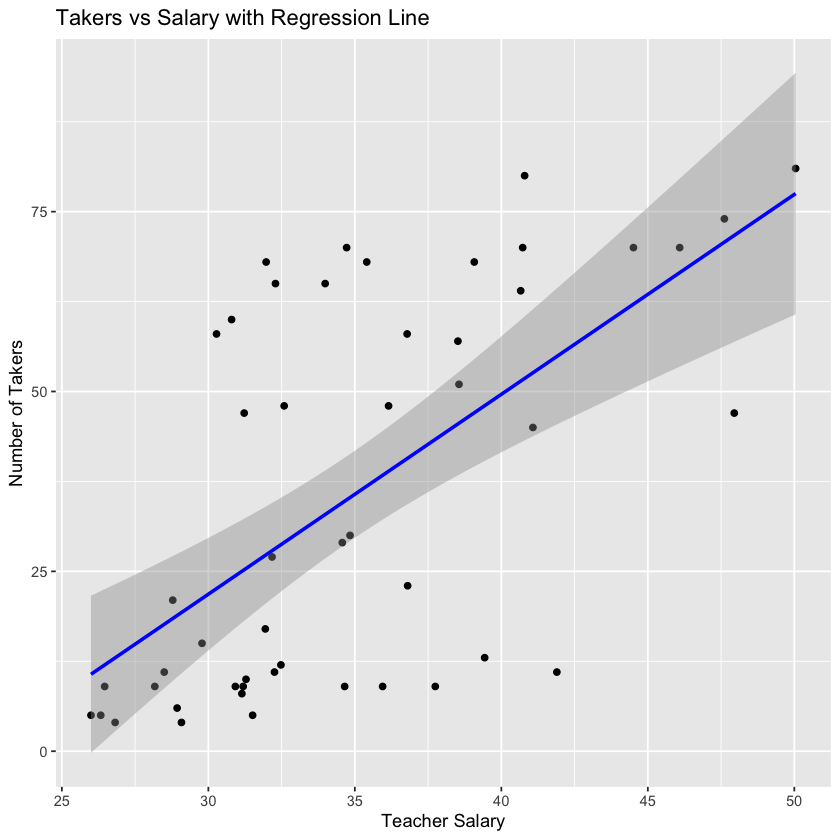

In [17]:
# Plot takers vs expenditure with a line of best fit
ggplot(data, aes(x = expend, y = takers)) +
  geom_point() +
  geom_smooth(method = "lm", col = "blue") +
  xlab("Expenditure per Pupil") +
  ylab("Number of Takers") +
  ggtitle("Takers vs Expenditure with Regression Line")

# Plot takers vs salary with a line of best fit
ggplot(data, aes(x = salary, y = takers)) +
  geom_point() +
  geom_smooth(method = "lm", col = "blue") +
  xlab("Teacher Salary") +
  ylab("Number of Takers") +
  ggtitle("Takers vs Salary with Regression Line")

> **Analysis**: There is a moderately strong correlation between the number of takers and expenditure (0.59) and salary (0.61), both of which are statistically significant. This suggests that states with higher expenditure and salary tend to have more students taking the SAT.

We will use a linear regression model to predict the number of takers based on expenditure and salary to see if we can accurately predict the number of students taking the SAT based on these variables.

In [18]:
model_takers_salary_expend <- lm(takers ~ salary+expend, data = data)
summary(model_takers_salary_expend)


Call:
lm(formula = takers ~ salary + expend, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-42.417 -13.694  -3.383  15.978  37.744 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  -56.798     18.682  -3.040  0.00386 **
salary         1.875      1.037   1.807  0.07711 . 
expend         4.529      4.522   1.002  0.32161   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 21.28 on 47 degrees of freedom
Multiple R-squared:  0.3934,	Adjusted R-squared:  0.3676 
F-statistic: 15.24 on 2 and 47 DF,  p-value: 7.92e-06


> **Analysis**: Our models R-squared value is 0.39. This means that 39% of the variance in the number of **takers** can be explained by the expenditure and salary variables. This is a moderate amount of variance explained, but it is not enough to accurately predict the number of takers based on expenditure and salary alone. Interestingly, neither salary or expenditure are statistically significant in there coefficient. This is likely due to the high correlation between the two variables.

---

## Overall Conclusion

- **Spending Impact on Test Scores**: With this data, we cannot conclusively show that states spending more per pupil achieve higher SAT scores. The strong effect of **takers** confounds any direct relationship. States with lower spending often have far fewer students taking the SAT, artificially boosting their average scores.  
- **Takers and Expenditure**: There is a moderate positive correlation indicating states investing more in education see more test-takers. Future analyses might explore if those states have higher college attendance rates overall.  
- **Model Performance**: Including **takers** in the regression explains most of the variance in scores, overshadowing the effects of **expenditure** or **salary**.  

**If we truly want to measure how spending impacts academic outcomes, we need a metric every student is required to take (or nearly all do) or a more universal measure like GPA.** States with low SAT participation may only have the most motivated test-takers, inflating average scores and skewing correlations with spending and salaries.